### Imports

In [1]:
import pandas as pd 
import numpy as np

### Data for Data Preparation

#### basics

In [241]:
### load all files individually
# current semester 
path="/Users/soenkedressler/Downloads/Text Analytics/HA_Text_Analytics/00-Data/"
df_1=pd.read_excel(path+"bereinigte_daten_gruppe_5.xlsx")
df_2=pd.read_excel(path+"Gruppe 1 Aufgabe 1 Lösung Loges.xlsx")
df_3=pd.read_excel(path+"analyst_gecrawled_unbereinigt.xlsx")
df_4=pd.read_excel(path+"data_indeed_schmidt_achim.xlsx")
df_5=pd.read_excel(path+"IndeedDaten_Gruppe4.xlsx")
df_6=pd.read_excel(path+"Data_G3-final.xlsx")
# previous semesters
df_7=pd.read_excel(path+"Stellenausschreibungen_2018.xlsx")
df_8=pd.read_excel(path+"Stellenausschreibungen_2019.xlsx")
df_9=pd.read_excel(path+"Stellenausschreibungen_2020_bereinigt.xlsx")
df_10=pd.read_excel(path+"Stellenausschreibungen_2021_HES.xlsx")
df_11=pd.read_excel(path+"Stellenausschreibungen_2022_HES.xlsx")

# data handling 
df_2=df_2.rename(columns={"Jobtitel":"Titel", "Firma":"Unternehmen", "Stellenbeschreibung":"Text"})
df_3=df_3.rename(columns={"Jobtitel":"Titel"})
df_4=df_4.rename(columns={"Jobtitel":"Titel", "Firma":"Unternehmen", "Beschreibung":"Text"})
df_2=df_2.filter(['Titel', 'Unternehmen', 'Text'])
df_4=df_4.filter(['Titel', 'Unternehmen', 'Text'])
df_10=df_10.filter(['Titel', 'Unternehmen', 'Text'])
df_11=df_11.filter(['Titel', 'Unternehmen', 'Text'])
# concat
include_semesters="current"
if include_semesters=="all":
    df_list_cur=[df_1,df_2,df_3,df_4,df_5,df_6]
    df_cur=pd.concat(df_list_cur)
    df_cur["Jahr"]=[int(2023) for i in range(len(df_cur))]
    df_7["Jahr"]=[int(2018) for i in range(len(df_7))]
    df_8["Jahr"]=[int(2019) for i in range(len(df_8))]
    df_9["Jahr"]=[int(2020) for i in range(len(df_9))]
    df_10["Jahr"]=[int(2021) for i in range(len(df_10))]
    df_11["Jahr"]=[int(2022) for i in range(len(df_11))]
    df_list=[df_cur,df_7, df_8,df_9,df_10,df_11]
    df=pd.concat(df_list)
    #df_list=[df_1,df_2,df_3,df_4,df_5,df_6,df_7,df_8,df_9,df_10,df_11]
elif include_semesters=="current":
    df_list=[df_1,df_2,df_3,df_4,df_5,df_6]
    df=pd.concat(df_list)

print("number of entries:", str(len(df)))
print("number of entries:", str(df.Text.nunique()))

number of entries: 1428
number of entries: 1336


In [242]:
import pandas as pd
import langdetect

# Define a function to detect the language of a given string
def detect_language(text):
    try:
        return langdetect.detect(text)
    except:
        return None

# Filter out the rows with English text
df = df[df['Text'].apply(lambda x: detect_language(str(x)) != 'en')]


In [243]:
df

Unternehmen  \
0   Volkswagen Group Services GmbH   
1              WIRmachenDRUCK GmbH   
2                     SIXT Germany   
3                     YoungCapital   
4             Siemens Healthineers   
..                             ...   
94                      Küchenheld   
95                Gauselmann Group   
96                        Limberry   
97               Grant Thornton AG   
98               Grant Thornton AG   

                                                Titel  \
0               Business Intelligence Analyst (m/w/d)   
1        Junior Data Analyst - remote deutschlandweit   
2                            Business Analyst (m/w/d)   
3                                Data Analyst (m/w/d)   
4                                Data Analyst (w/m/d)   
..                                                ...   
94  Werkstudent Business Intelligence Analyst (w/m/d)   
95  Werkstudent Data Analytics / Datenbankenanalys...   
96  Werkstudent oder Praktikant (m/w/d) im Busines...   
97  (Senior) Consultant als Security Operations Ce...   
98  (Senior) Consultant als Incident Handler / For...   

                                                 Text  
0   Stellenbeschreibung Anstellungsart Vollzeit Vo...  
1   Stellenbeschreibung Anstellungsart Vollzeit Fe...  
2   \n Du begleitest die internationale Einführung...  
3   Stellenbeschreibung Gehalt 17 € – 18 € pro Stu...  
4   Stellenbeschreibung Anstellungsart Vollzeit Te...  
..                                                ...  
94  Als Teil unseres Business Intelligence Teams b...  
95  Tippen und gewinnen! Wetten, dass? Wir vermitt...  
96  Du bist engagiert und möchtest deinen nächsten...  
97  Kennziffer 2023-546 Einsatzort Düsseldorf Stel...  
98  Kennziffer 2023-545 Einsatzort Düsseldorf Stel...  

[1246 rows x 3 columns]

In [248]:
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
#import spacy

# function to preprocess text
def preprocess_text(text):
    # remove numbers and punctuation
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.replace("\n"," ")
    text = text.replace("\n"," ")

    # lowercase text
    text = text.lower()

    # tokenize text into words
    words = nltk.word_tokenize(text)

    # remove stopwords
    stop_words = set(stopwords.words('german'))
    words = [word for word in words if word not in stop_words]

    # lemmatize words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    #nlp = spacy.load('de_core_news_sm')
    #words = " ".join([token.lemma_ for token in nlp(words)])
    # join words back into a string
    text = ' '.join(words)
    if "hiring insight anzeigenaktivitäten" in text:
        text = text.split("hiring insight anzeigenaktivitäten")[0]
    if "stellenbeschreibung anstellungsart vollzeit vollständige stellenbeschreibung" in text:
        text = text.split("stellenbeschreibung anstellungsart vollzeit vollständige stellenbeschreibung")[1]

    return text

# apply preprocessing function to the text column in the dataframe
df['text_processed'] = df['Text'].astype(str).apply(preprocess_text)

In [249]:
df

Unternehmen  \
0   Volkswagen Group Services GmbH   
1              WIRmachenDRUCK GmbH   
2                     SIXT Germany   
3                     YoungCapital   
4             Siemens Healthineers   
..                             ...   
94                      Küchenheld   
95                Gauselmann Group   
96                        Limberry   
97               Grant Thornton AG   
98               Grant Thornton AG   

                                                Titel  \
0               Business Intelligence Analyst (m/w/d)   
1        Junior Data Analyst - remote deutschlandweit   
2                            Business Analyst (m/w/d)   
3                                Data Analyst (m/w/d)   
4                                Data Analyst (w/m/d)   
..                                                ...   
94  Werkstudent Business Intelligence Analyst (w/m/d)   
95  Werkstudent Data Analytics / Datenbankenanalys...   
96  Werkstudent oder Praktikant (m/w/d) im Busines...   
97  (Senior) Consultant als Security Operations Ce...   
98  (Senior) Consultant als Incident Handler / For...   

                                                 Text  \
0   Stellenbeschreibung Anstellungsart Vollzeit Vo...   
1   Stellenbeschreibung Anstellungsart Vollzeit Fe...   
2   \n Du begleitest die internationale Einführung...   
3   Stellenbeschreibung Gehalt 17 € – 18 € pro Stu...   
4   Stellenbeschreibung Anstellungsart Vollzeit Te...   
..                                                ...   
94  Als Teil unseres Business Intelligence Teams b...   
95  Tippen und gewinnen! Wetten, dass? Wir vermitt...   
96  Du bist engagiert und möchtest deinen nächsten...   
97  Kennziffer 2023-546 Einsatzort Düsseldorf Stel...   
98  Kennziffer 2023-545 Einsatzort Düsseldorf Stel...   

                                       text_processed  
0    stellenangebot volkswagen group service gmbh ...  
1   stellenbeschreibung anstellungsart vollzeit fe...  
2   begleitest internationale einführung softwarel...  
3   stellenbeschreibung gehalt € – € pro stunde an...  
4   stellenbeschreibung anstellungsart vollzeit te...  
..                                                ...  
94  teil business intelligence team wichtige schni...  
95  tippen gewinnen wetten vermitteln vermarkten s...  
96  engagiert möchtest nächsten karriereschritt ju...  
97  kennziffer einsatzort düsseldorf stellenbezeic...  
98  kennziffer einsatzort düsseldorf stellenbezeic...  

[1246 rows x 4 columns]

In [250]:
df["text_processed"].iloc[0]

' stellenangebot volkswagen group service gmbh dienstleistungsanbieter innerhalb volkswagen konzerns bieten abwechslungsreiche projekterfahrungen beim größten automobilhersteller welt internationale strategische business intelligence projekte innovative arbeitsmethoden umfassende fortbildungsmöglichkeiten aufgabenbereich analyse systeme gesamten einkauf volkswagen konzerns zudem unterstützen weitere bereiche business intelligence analysen all projekten nutzen dabei data analytics tool sql python etc team bereich business intelligence sucht unterstützung bi spezialisten mwd nutz chance bewirb aufgaben detail business intelligence specialist mwd fachliche konzeption bianforderungen beratung weiterentwicklung internen bilösungen zuständig erstellung analysen auswertungen einkauf data warehouse weiteren quellen gehören aufgabenbereich kundenspezifischen analysen auswertungen baust setzt veröffentlichst dokumentierst berichte volkswagen portal eigenständig pflegst metadaten prüfst datenqual

#### transformation of the text for Gensim 

transformation––words

In [251]:
import pandas as pd
import gensim
from gensim.utils import simple_preprocess

# convert text_processed column to a list of lists consisting of tokens 
df["text_processed_gensim"] = [simple_preprocess(line, deacc=True) for line in df['text_processed']]

# create a dictionary from the data ==> maps each unique token in the data to a unique integer ID 
df_dictionary_words = gensim.corpora.Dictionary(df["text_processed_gensim"])

# filter out words that are not in a min of 5 docs and are in less than 50 % of alle docs
df_dictionary_words.filter_extremes(no_below=5, no_above=0.5)

# create a corpus == bag-of-words from the data 
# ==> corpus = nested list of bag-of-words representations of each document 
# ==> each tuple contains the integer ID of a token and the count of that token in the document 
df_corpus_words = [df_dictionary_words.doc2bow(line) for line in df["text_processed_gensim"]]

transformation––bi-grams

In [252]:
import gensim
from gensim import corpora
import pandas as pd
from nltk import ngrams

# creating bi-grams using nltk 
df["text_processed_gensim_bi_grams"] = df["text_processed_gensim"].apply(lambda x: list(ngrams(x, 2)))

# formating the bi-grams using "_" (text1_text2) for preparation for gensim 
df["text_processed_gensim_bi_grams"] = df["text_processed_gensim_bi_grams"].apply(lambda x: ["{}_{}".format(w1, w2) for w1, w2 in x])

# create a dictionary from the bi-grams
df_dictionary_bi_grams = corpora.Dictionary(df["text_processed_gensim_bi_grams"])
df_dictionary_bi_grams.filter_extremes(no_below=5, no_above=0.5)

# create a corpus from the bi-grams
df_corpus_bi_grams = [df_dictionary_bi_grams.doc2bow(bi_grams) for bi_grams in df["text_processed_gensim_bi_grams"]]

checking

In [253]:
print("len of df-column: ", str(len(df.Text)))
print("len of df tokenized: ", str(len(df["text_processed_gensim"])))
print("len of df bi-gram: ", str(len(df["text_processed_gensim_bi_grams"])))
print("len of corpus (bow) –– words: ", str(len(df_corpus_words)))
print("len of corpus (bow) –– bi-grams: ", str(len(df_corpus_bi_grams)))

print("*********")

print("checking of the tokenized text")
print(df["text_processed_gensim"][0:3])
print("*********")

print("checking of the b-grams")
print(df["text_processed_gensim_bi_grams"][0:3])
print("*********")

print("checking bow transformation –– words")
print(df_corpus_words[0])

print("checking bow transformation –– bi-grams")
print(df_corpus_bi_grams[0])

len of df-column:  1246
len of df tokenized:  1246
len of df bi-gram:  1246
len of corpus (bow) –– words:  1246
len of corpus (bow) –– bi-grams:  1246
*********
checking of the tokenized text
0    [stellenangebot, volkswagen, group, service, g...
1    [anstellungsart, vollzeit, festanstellung, hom...
2    [begleitest, internationale, einfuhrung, proje...
Name: text_processed_gensim, dtype: object
*********
checking of the b-grams
0    [stellenangebot_volkswagen, volkswagen_group, ...
1    [anstellungsart_vollzeit, vollzeit_festanstell...
2    [begleitest_internationale, internationale_ein...
Name: text_processed_gensim_bi_grams, dtype: object
*********
checking bow transformation –– words
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 3), (6, 1), (7, 1), (8, 2), (9, 1), (10, 1), (11, 1), (12, 2), (13, 1), (14, 2), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 2), (25, 1), (26, 1), (27, 2), (28, 1), (29, 1), (30, 1), (31, 4), (32, 1), (33, 1), (34, 

### LDA

#### Execution with x topics for the Jobtitels

#### LDA for x topics –– words

distinct job titles

In [254]:
print(df.Titel.nunique())
print(df.Titel.value_counts())

935
Data Analyst (m/w/d)                                                                      22
Business Analyst (m/w/d)                                                                  20
Business Analyst (m/w/d)                                                                  13
Business Intelligence Analyst (m/w/d)                                                     11
Data Analyst (m/w/d)                                                                      10
                                                                                          ..
SAP Business Analyst Aftermarket (m/w/d)                                                   1
Senior Financial Analyst (m/w/d)                                                           1
Financial Analyst (m/w/d) (Business-Analyst/in)                                            1
Teamlead (Insurance - Süd) Business Analysis, Project Management & Innovation (w/m/x)      1
(Senior) Consultant als Incident Handler / Forensics Analyst (m/w/

model creation

In [255]:
from gensim.models import LdaModel
lda_model_gensim_words = LdaModel(
    corpus=df_corpus_words, id2word=df_dictionary_words,
    chunksize=2000, alpha='auto', eta='auto', iterations=400, num_topics=30,
    passes=20, eval_every=None, random_state=42
    )

coherence score

In [256]:
from gensim.models.coherencemodel import CoherenceModel
lda_model_gensim_words_coherence = CoherenceModel(
    model=lda_model_gensim_words,
    texts=df["text_processed_gensim"], dictionary=df_dictionary_words, coherence='c_v'
    ) #c_uci

lda_model_gensim_words_coherence_score = lda_model_gensim_words_coherence.get_coherence() 

print(lda_model_gensim_words_coherence_score)

-2.4716829942557257


show topics

In [257]:
for idx, topic in lda_model_gensim_words.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic))

Topic: 0 
Words: 0.006*"deutschland" + 0.006*"unserer" + 0.006*"unterstutzung" + 0.006*"unternehmen" + 0.006*"hast" + 0.005*"dabei" + 0.005*"management" + 0.005*"arbeitsweise" + 0.005*"erfahrung" + 0.004*"bewerbung"
Topic: 1 
Words: 0.007*"of" + 0.007*"and" + 0.006*"unterstutzung" + 0.006*"analyse" + 0.006*"the" + 0.006*"bereichen" + 0.006*"microsoft" + 0.006*"linux" + 0.006*"daten" + 0.005*"business"
Topic: 2 
Words: 0.009*"kunden" + 0.008*"customer" + 0.007*"berufserfahrung" + 0.006*"business" + 0.006*"unternehmen" + 0.006*"stellen" + 0.006*"security" + 0.005*"sicher" + 0.005*"management" + 0.005*"mwd"
Topic: 3 
Words: 0.034*"medium" + 0.008*"energie" + 0.007*"moglich" + 0.007*"suchen" + 0.006*"daten" + 0.006*"wmd" + 0.006*"arbeit" + 0.005*"medien" + 0.005*"erfahrung" + 0.005*"frau"
Topic: 4 
Words: 0.013*"data" + 0.007*"analytics" + 0.007*"kunden" + 0.006*"unserer" + 0.005*"arbeitszeiten" + 0.005*"mwd" + 0.004*"business" + 0.004*"flexible" + 0.004*"erfahrung" + 0.004*"analyse"
Topic

visualization

In [258]:
# Import the necessary packages
import gensim
import pyLDAvis.gensim_models
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Visualize the LDA model using pyLDAvis
pyLDAvis.enable_notebook()
lda_visual = pyLDAvis.gensim_models.prepare(lda_model_gensim_words, df_corpus_words, df_dictionary_words)
pyLDAvis.display(lda_visual)

/Users/soenkedressler/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/soenkedressler/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/soenkedressler/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/soenkedressler/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/soenkedressler/opt/anaconda3/lib/

#### LDA for x topics –– bi-grams

model creation

In [259]:
from gensim.models import LdaModel

lda_model_gensim_bi_grams = LdaModel(
    corpus=df_corpus_bi_grams, id2word=df_dictionary_bi_grams,
    chunksize=2000, alpha='auto', eta='auto', iterations=400, num_topics=30,
    passes=20, eval_every=None, random_state=42
    )

coherence score

In [260]:
from gensim.models.coherencemodel import CoherenceModel
lda_model_gensim_bi_grams_coherence = CoherenceModel(
    model=lda_model_gensim_bi_grams,
    texts=df["text_processed_gensim"], dictionary=df_dictionary_bi_grams, coherence='c_uci'
    )

lda_model_gensim_bi_grams_coherence_score = lda_model_gensim_bi_grams_coherence.get_coherence() 

print(lda_model_gensim_bi_grams_coherence_score)

nan


show topics

In [261]:
for idx, topic in lda_model_gensim_bi_grams.print_topics(-1):
    if int(idx)<=10:
        print("Topic: {} \nWords: {}".format(idx, topic))

Topic: 0 
Words: 0.008*"analyst_mwd" + 0.007*"flexible_arbeitszeiten" + 0.006*"data_analyst" + 0.006*"erforderlich_nein" + 0.005*"frankfurt_main" + 0.004*"wort_schrift" + 0.004*"pro_stunde" + 0.004*"business_analyst" + 0.003*"anstellungsart_festanstellung" + 0.003*"neue_wege"
Topic: 1 
Words: 0.012*"analyst_mwd" + 0.010*"flexible_arbeitszeiten" + 0.010*"business_analyst" + 0.009*"supply_chain" + 0.006*"freuen_bewerbung" + 0.006*"ab_sofort" + 0.005*"daruber_hinaus" + 0.005*"gute_deutsch" + 0.005*"kaufmannische_ausbildung" + 0.004*"internen_externen"
Topic: 2 
Words: 0.008*"state_street" + 0.004*"abgeschlossenes_studium" + 0.004*"wort_schrift" + 0.003*"flexible_arbeitszeiten" + 0.003*"kunden_mwd" + 0.003*"data_analyst" + 0.003*"depositary_analyst" + 0.003*"analyst_teamleiter" + 0.003*"arbeitsumfeld_schaffen" + 0.003*"you_can"
Topic: 3 
Words: 0.017*"job_bewerben" + 0.017*"workwise_partner" + 0.017*"status_bewerbung" + 0.017*"minuten_anschreiben" + 0.017*"bewerbung_live" + 0.017*"wenigen_

visualization

In [262]:
# Import the necessary packages
import gensim
import pyLDAvis.gensim_models
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Visualize the LDA model using pyLDAvis
pyLDAvis.enable_notebook()
lda_visual = pyLDAvis.gensim_models.prepare(lda_model_gensim_bi_grams, df_corpus_bi_grams, df_dictionary_bi_grams)
pyLDAvis.display(lda_visual)

/Users/soenkedressler/opt/anaconda3/lib/python3.9/site-packages/joblib/backports.py:36: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/Users/soenkedressler/opt/anaconda3/lib/python3.9/site-packages/joblib/backports.py:36: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/Users/soenkedressler/opt/anaconda3/lib/python3.9/site-packages/joblib/backports.py:36: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/Users/soenkedressler/opt/anaconda3/lib/python3.9/site-packages/joblib/backports.py:36: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/Users/soenkedressler/opt/anaconda3/lib/python3.9/site-packages/joblib/backports.py:36: DeprecationW

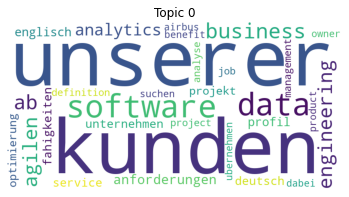

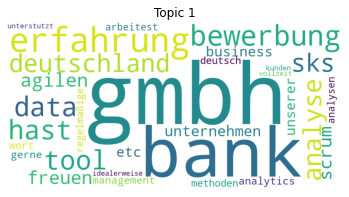

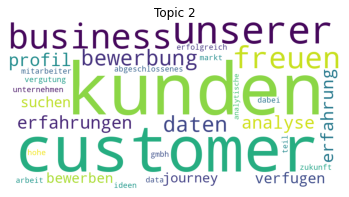

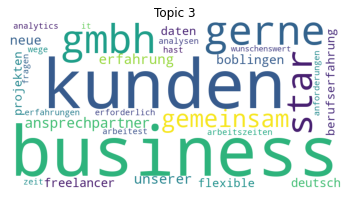

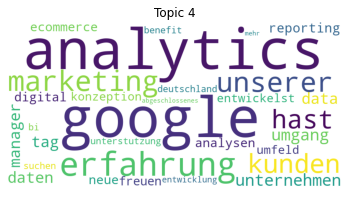

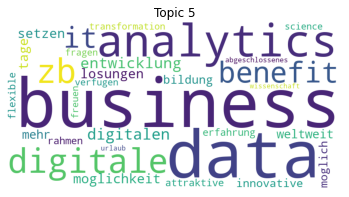

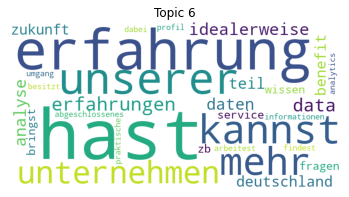

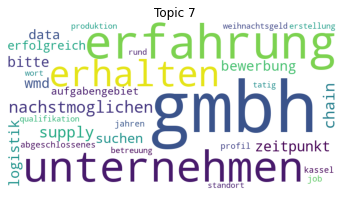

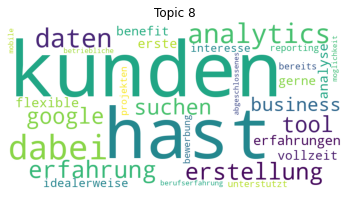

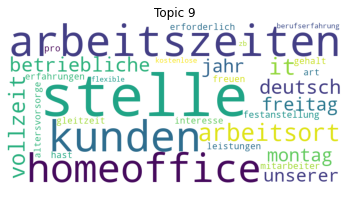

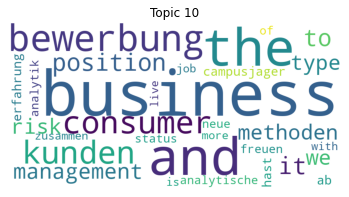

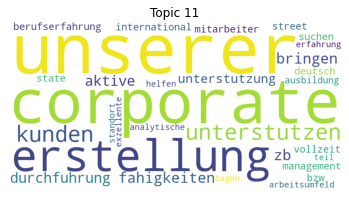

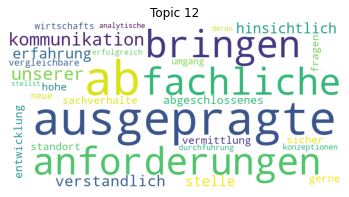

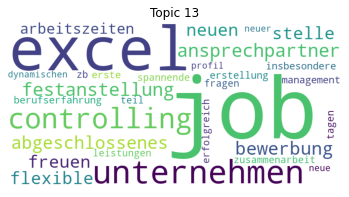

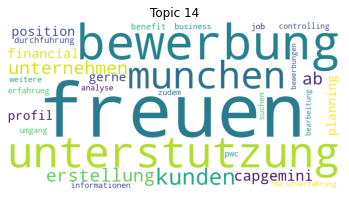

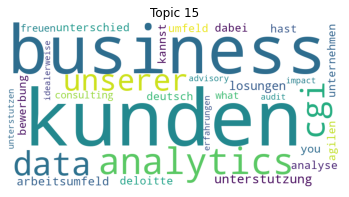

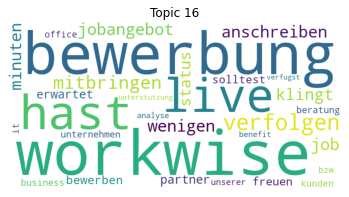

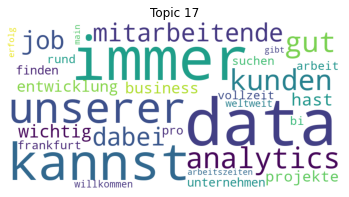

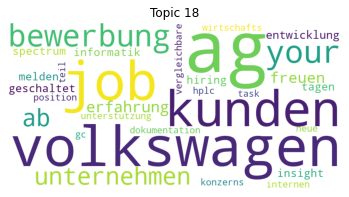

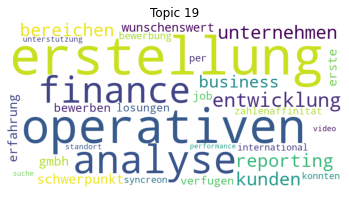

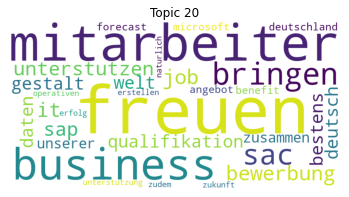

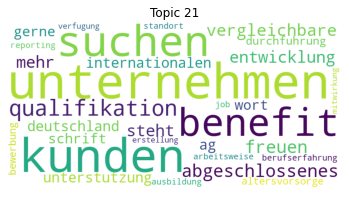

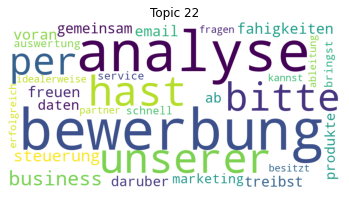

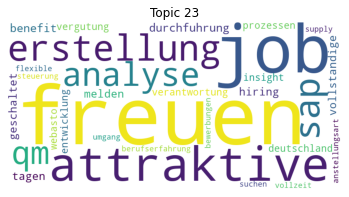

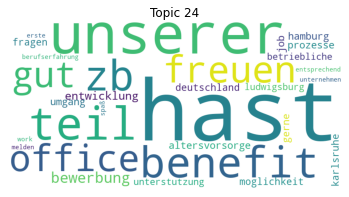

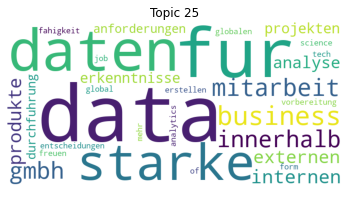

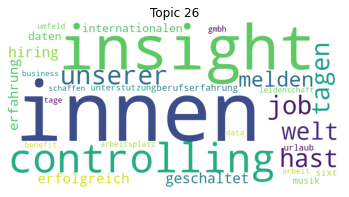

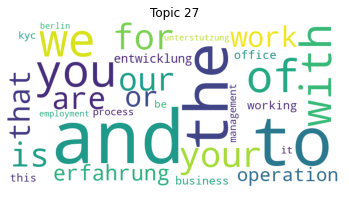

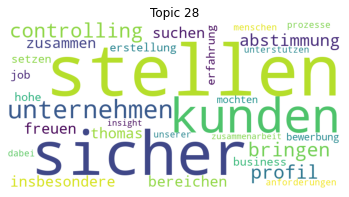

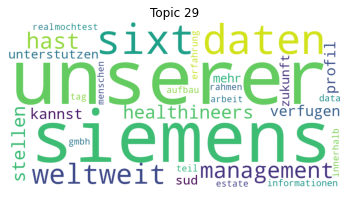

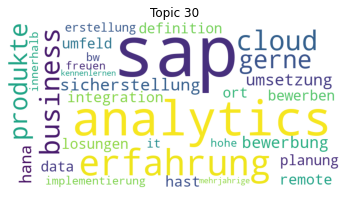

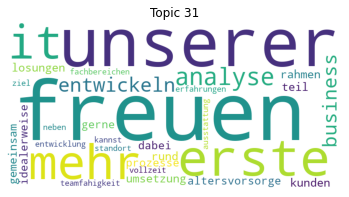

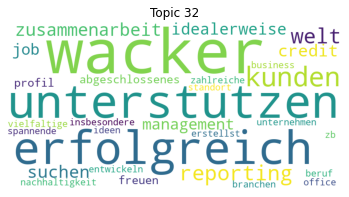

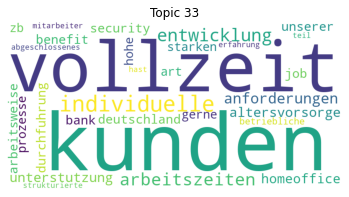

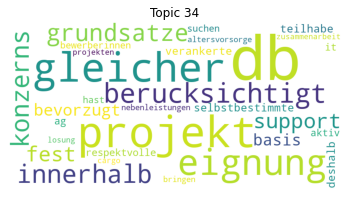

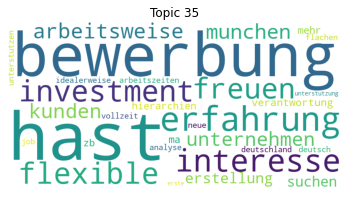

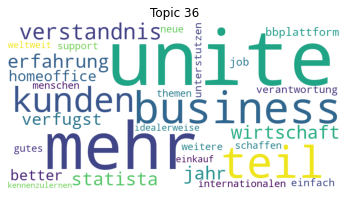

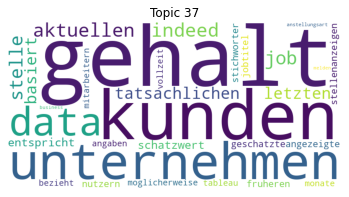

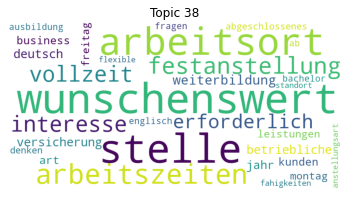

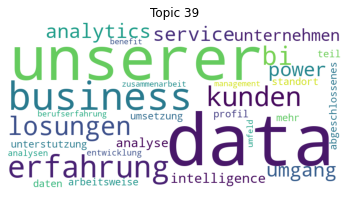

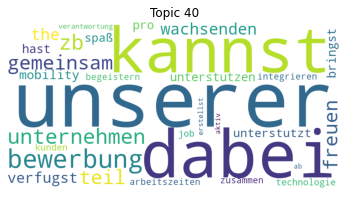

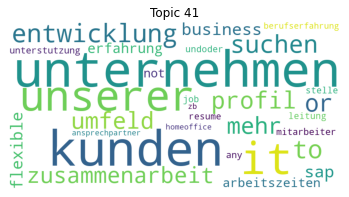

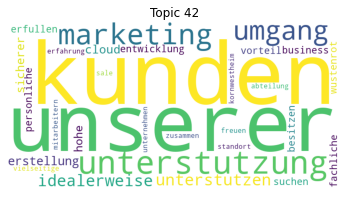

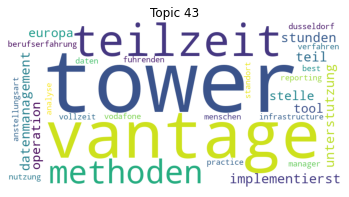

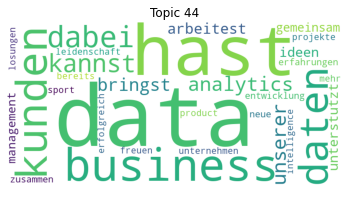

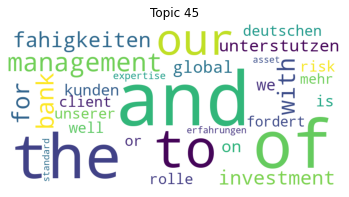

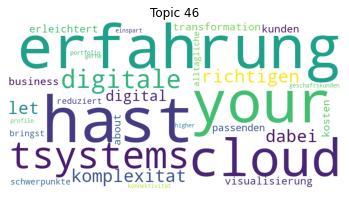

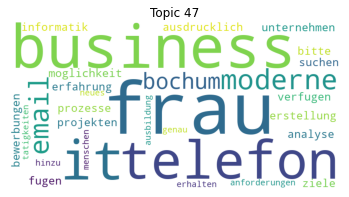

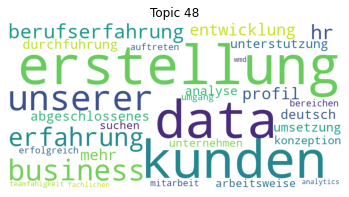

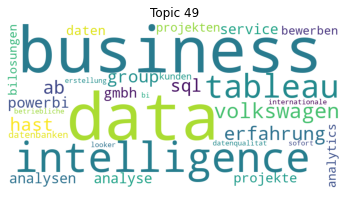

In [264]:
# Generate word clouds for each topic
for i in range(lda_model.num_topics):
    plt.figure()
    plt.imshow(WordCloud(background_color='white', width=800, height=400).fit_words(dict(lda_model.show_topic(i, 30))))
    plt.axis('off')
    plt.title('Topic {}'.format(i))
    plt.show()

coherence score 

In [ ]:
from gensim.models.coherencemodel import CoherenceModel
lda_gensim_para_coherence = CoherenceModel(
    model=lda_model_gensim,
    texts=df["text_processed_gensim"], dictionary=df_dictionary, coherence='c_uci'
    )

lda_gensim_para_coherence_score = lda_gensim_para_coherence.get_coherence() 

print(lda_gensim_para_coherence_score)

In [ ]:
top_topics = lda_gensim_para.top_topics(df_corpus, topn=5) 
avg_topic_coherence = sum([t[1] for t in top_topics]) / len(top_topics) 
print('Average topic coherence: %.4f.' % avg_topic_coherence)

#### Execution with coherence score (other variables are possible) –– words

coherence score for choosing the number of topics

In [ ]:
from gensim.models.ldamulticore import LdaMulticore 
from tqdm import tqdm

lda_para_model_n = []
for n in tqdm(range(10, 201, 10)):
    lda_model = LdaMulticore(
        corpus=df_corpus_words, id2word=df_dictionary_words,
        chunksize=2000, eta='auto', iterations=400,
        num_topics=n, passes=20, eval_every=None,
        random_state=42
        )
    lda_coherence = CoherenceModel(model=lda_model, texts=df["text_processed_gensim"], dictionary=df_dictionary_words, coherence='c_v')
    lda_para_model_n.append((n, lda_model, lda_coherence.get_coherence()))

100%|██████████| 20/20 [30:36<00:00, 91.82s/it] 


visialization 

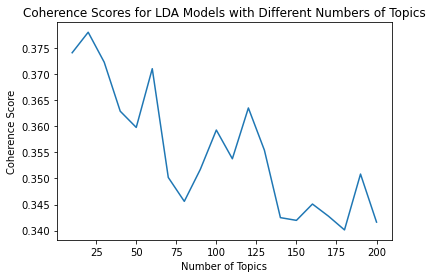

In [ ]:
import matplotlib.pyplot as plt

# Extract the number of topics and coherence scores from the results
num_topics = [x[0] for x in lda_para_model_n]
coherence_scores = [x[2] for x in lda_para_model_n]

# Create a line plot of coherence scores versus number of topics
plt.plot(num_topics, coherence_scores)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Scores for LDA Models with Different Numbers of Topics")
plt.show()

In [ ]:
from gensim.models.ldamulticore import LdaMulticore 
from tqdm import tqdm

lda_para_model_n_c_v = []
for n in tqdm(range(10, 201, 10)):
    lda_model = LdaMulticore(
        corpus=df_corpus_words, id2word=df_dictionary_words,
        chunksize=2000, eta='auto', iterations=400,
        num_topics=n, passes=20, eval_every=None,
        random_state=42
        )
    lda_coherence = CoherenceModel(model=lda_model, texts=df["text_processed_gensim"], dictionary=df_dictionary_words, coherence='c_uci')
    lda_para_model_n_c_v.append((n, lda_model, lda_coherence.get_coherence()))

 25%|██▌       | 5/20 [06:51<20:35, 82.40s/it]


KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt

# Extract the number of topics and coherence scores from the results
num_topics = [x[0] for x in lda_para_model_n_uci]
coherence_scores = [x[2] for x in lda_para_model_n_uci]

# Create a line plot of coherence scores versus number of topics
plt.plot(num_topics, coherence_scores)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Scores for LDA Models with Different Numbers of Topics")
plt.show()

choosing the number of topis

In [265]:
num_topics=60

LDA for that number

In [266]:
from gensim.models import LdaModel
lda_model_gensim_words = LdaModel(
    corpus=df_corpus_words, id2word=df_dictionary_words,
    chunksize=2000, alpha='auto', eta='auto', iterations=400, num_topics=num_topics,
    passes=20, eval_every=None, random_state=42
    )

visualization

In [267]:
# Import the necessary packages
import gensim
import pyLDAvis.gensim_models
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Visualize the LDA model using pyLDAvis
pyLDAvis.enable_notebook()
lda_visual = pyLDAvis.gensim_models.prepare(lda_model_gensim_words, df_corpus_words, df_dictionary_words)
pyLDAvis.display(lda_visual)

/Users/soenkedressler/opt/anaconda3/lib/python3.9/site-packages/joblib/backports.py:36: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/Users/soenkedressler/opt/anaconda3/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Users/soenkedressler/opt/anaconda3/lib/python3.9/site-packages/joblib/backports.py:36: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/Users/soenkedressler/opt/anaconda3/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Users/soenkedressler/opt/anaconda3/lib/python3.9/site-packages/joblib/backports.py:36: DeprecationW

## Clustering

### Data from LDA

In [268]:
import gensim
from gensim import corpora, models

# get document-topic representation for each document
doc_topic_df_list = []
for index, i in enumerate(df["text_processed_gensim"]):
    doc_bow = df_dictionary_words.doc2bow(i)
    doc_topics = lda_model_gensim_words.get_document_topics(bow=doc_bow)
    doc_top_df=pd.DataFrame(doc_topics, columns=["topic", "score"])
    doc_top_df["doc_num"]=[index for x in range(len(doc_top_df))]
    doc_topic_df_list.append(doc_top_df)

doc_topic_matrix = pd.concat(doc_topic_df_list)
doc_topic_matrix["topic"]=doc_topic_matrix["topic"]+1
doc_topic_matrix=doc_topic_matrix.pivot_table(index="doc_num", columns="topic", values="score").fillna(0).reset_index()

In [269]:
doc_topic_matrix

topic  doc_num    1    2        3    4    5    6    7    8    9  ...  \
0            0  0.0  0.0  0.00000  0.0  0.0  0.0  0.0  0.0  0.0  ...   
1            1  0.0  0.0  0.00000  0.0  0.0  0.0  0.0  0.0  0.0  ...   
2            2  0.0  0.0  0.00000  0.0  0.0  0.0  0.0  0.0  0.0  ...   
3            3  0.0  0.0  0.00000  0.0  0.0  0.0  0.0  0.0  0.0  ...   
4            4  0.0  0.0  0.00000  0.0  0.0  0.0  0.0  0.0  0.0  ...   
...        ...  ...  ...      ...  ...  ...  ...  ...  ...  ...  ...   
1241      1241  0.0  0.0  0.99416  0.0  0.0  0.0  0.0  0.0  0.0  ...   
1242      1242  0.0  0.0  0.00000  0.0  0.0  0.0  0.0  0.0  0.0  ...   
1243      1243  0.0  0.0  0.00000  0.0  0.0  0.0  0.0  0.0  0.0  ...   
1244      1244  0.0  0.0  0.00000  0.0  0.0  0.0  0.0  0.0  0.0  ...   
1245      1245  0.0  0.0  0.00000  0.0  0.0  0.0  0.0  0.0  0.0  ...   

topic        51   52        53   54   55        56   57   58        59   60  
0      0.000000  0.0  0.995468  0.0  0.0  0.000000  0.0  0.0  0.000000  0.0  
1      0.000000  0.0  0.000000  0.0  0.0  0.000000  0.0  0.0  0.000000  0.0  
2      0.000000  0.0  0.000000  0.0  0.0  0.000000  0.0  0.0  0.000000  0.0  
3      0.000000  0.0  0.000000  0.0  0.0  0.000000  0.0  0.0  0.000000  0.0  
4      0.000000  0.0  0.000000  0.0  0.0  0.000000  0.0  0.0  0.000000  0.0  
...         ...  ...       ...  ...  ...       ...  ...  ...       ...  ...  
1241   0.000000  0.0  0.000000  0.0  0.0  0.000000  0.0  0.0  0.000000  0.0  
1242   0.000000  0.0  0.000000  0.0  0.0  0.000000  0.0  0.0  0.000000  0.0  
1243   0.000000  0.0  0.000000  0.0  0.0  0.995081  0.0  0.0  0.000000  0.0  
1244   0.000000  0.0  0.000000  0.0  0.0  0.000000  0.0  0.0  0.048855  0.0  
1245   0.106799  0.0  0.000000  0.0  0.0  0.000000  0.0  0.0  0.000000  0.0  

[1246 rows x 61 columns]

### model and parameters 

In [271]:
from sklearn.cluster import KMeans #Bisecting

# Use document-topic representation as input for k-means clustering
kmeans = KMeans(n_clusters=10, random_state=0, ).fit(doc_topic_matrix)

### gerneral evaluation of the results 

visual

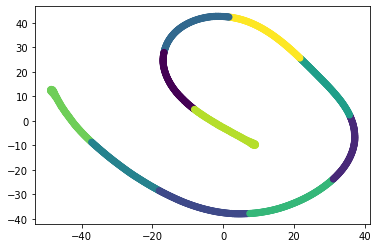

In [272]:
from sklearn.manifold import TSNE
# Reduce dimensionality of document-topic representation using t-SNE
tsne_model = TSNE(n_components=2, random_state=0)
doc_topic_tsne = tsne_model.fit_transform(doc_topic_matrix)

# Plot the results
plt.scatter(doc_topic_tsne[:, 0], doc_topic_tsne[:, 1], c=kmeans.labels_)
plt.show()

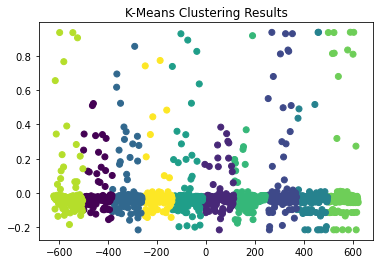

In [273]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Perform PCA on the data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(doc_topic_matrix)

# Plot the results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_)
plt.title('K-Means Clustering Results')
plt.show()

cluster size 

metrics

In [274]:
import pandas as pd
import gensim
from gensim import corpora, models
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import pairwise_distances
import numpy as np
import math

# Calculate f1-score
labels_true = df["True Labels"]
labels_pred = clustering.labels_
f_score = f1_score(labels_true, labels_pred, average='weighted')

# Calculate confusion matrix
confusion_mtx = confusion_matrix(labels_true, labels_pred)

# Calculate cohesion and separation
dists = pairwise_distances(doc_topic, metric='euclidean')
avg_dist = np.mean(dists)
intra_cluster_dists = np.zeros(clustering.n_clusters)
inter_cluster_dists = np.zeros(clustering.n_clusters)
for i in range(clustering.n_clusters):
    indices = np.where(clustering.labels_ == i)[0]
    cluster_dists = dists[np.ix_(indices, indices)]
    intra_cluster_dists[i] = np.mean(cluster_dists)
    other_cluster_dists = dists[np.ix_(indices, np.where(clustering.labels_ != i)[0])]
    inter_cluster_dists[i] = np.mean(other_cluster_dists)
cohesion = np.mean(intra_cluster_dists)
separation = np.mean(inter_cluster_dists)

# Calculate entropy
entropy = 0
for i in range(clustering.n_clusters):
    indices = np.where(clustering.labels_ == i)[0]
    p_i = len(indices) / len(clustering.labels_)
    if p_i > 0:
        entropy_i = -p_i * np.sum(np.log(p_i))
    else:
        entropy_i = 0
    entropy += entropy_i

# Print evaluation metrics
print("F-score:", f_score)
print("Confusion matrix:")
print(confusion_mtx)
print("Cohesion:", cohesion)
print("Separation:", separation)
print("Entropy:", entropy)

KeyError: 'True Labels'

topics in the clusters 

crossovers

#### visualization (PCA / TSNE) 

dimensionality reduction

In [ ]:
# Reduce dimensionality of document-topic representation using t-SNE
tsne_model = TSNE(n_components=2, random_state=0)
doc_topic_tsne = tsne_model.fit_transform(doc_topic)

# Plot the results
plt.scatter(doc_topic_tsne[:, 0], doc_topic_tsne[:, 1], c=kmeans.labels_)
plt.show()

ploting in 2D

ploting in 3D

#### application of clustering with k-menas clustering

silhouette score for choosing the cluster count

In [276]:
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(doc_topic_matrix)
    silhouette_avg = silhouette_score(doc_topic_matrix, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Choose number of clusters based on silhouette scores
n_clusters = silhouette_scores.index(max(silhouette_scores)) + 2 # add 2 to account for starting at n_clusters=2

NameError: name 'silhouette_score' is not defined

#### application of clustering with spectral clustering

silhouette score for choosing the cluster count

In [ ]:
# Use silhouette method to choose number of clusters for spectral clustering
silhouette_scores = []
for n_clusters in range(2, 11):
    spectral = SpectralClustering(n_clusters=n_clusters, random_state=0)
    cluster_labels = spectral.fit_predict(doc_topic)
    silhouette_avg = silhouette_score(doc_topic, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Choose number of clusters based on silhouette scores
n_clusters = silhouette_scores.index(max(silhouette_scores)) + 2 # add 2 to account for starting at n_clusters=2


#### model and parameters 

In [277]:
from sklearn.cluster import SpectralClustering

# Use document-topic representation as input for spectral clustering
spectral = SpectralClustering(n_clusters=10, random_state=0, affinity='nearest_neighbors', n_neighbors=10).fit(doc_topic_matrix)

#### gerneral evaluation of the results 

visual

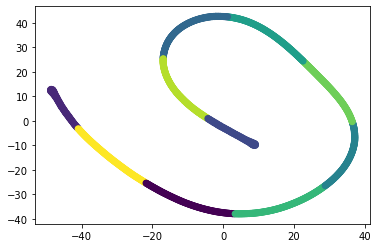

In [278]:
# Reduce dimensionality of document-topic representation using t-SNE
tsne_model = TSNE(n_components=2, random_state=0)
doc_topic_tsne = tsne_model.fit_transform(doc_topic_matrix)

# Plot the results
plt.scatter(doc_topic_tsne[:, 0], doc_topic_tsne[:, 1], c=spectral.labels_)
plt.show()

In [299]:
import numpy as np
import plotly.graph_objs as go
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Perform PCA on the data
pca = PCA(n_components=3)
X_pca = pca.fit_transform(doc_topic_matrix)

tsne_model = TSNE(n_components=3, random_state=0, perplexity=10, learning_rate=10, n_iter=4000)
doc_topic_tsne = tsne_model.fit_transform(doc_topic_matrix)

X_pca=doc_topic_tsne

# Create a trace for each cluster
traces = []
for i in range(spectral.n_clusters):
    cluster_idx = np.where(spectral.labels_ == i)[0]
    trace = go.Scatter3d(
        x=X_pca[cluster_idx, 0],
        y=X_pca[cluster_idx, 1],
        z=X_pca[cluster_idx, 2],
        mode='markers',
        marker=dict(
            size=5,
            color=i,
            colorscale='Viridis',
            opacity=0.8
        ),
        name='Cluster {}'.format(i)
    )
    traces.append(trace)

# Create the layout for the plot
layout = go.Layout(
    margin=dict(l=0, r=0, b=0, t=0),
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3'
    )
)

# Create the figure and plot the traces
go.Figure(data=traces, layout=layout).show()

import plotly.offline as pyo
pyo.plot(go.Figure(data=traces, layout=layout), filename='3d-plot.html')

'3d-plot.html'

cluster size 

'3d-plot.html'

metrics

topics in the clusters 

crossovers